In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# testing the neural prophet library
from neuralprophet import NeuralProphet

### Using Seasonal Decompose to test the underlying seasonality of the data

In [16]:
import os

# Construct the relative path
relative_path = os.path.join('traindata.csv')

# Read the CSV file using the relative path
trainingdata = pd.read_csv(relative_path)

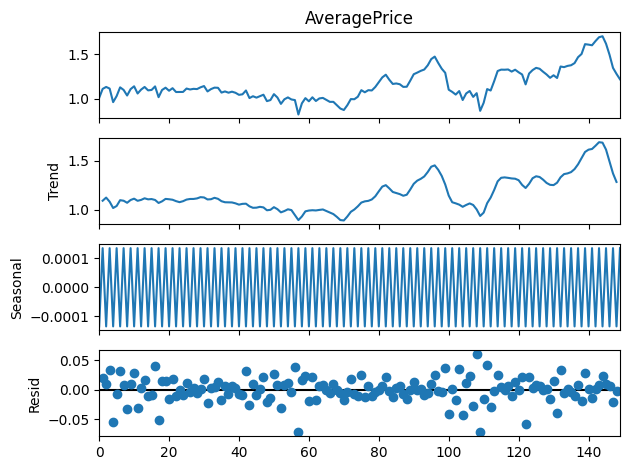

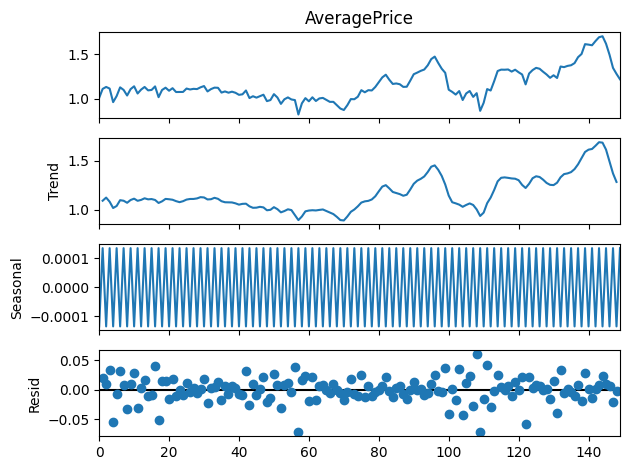

In [17]:
# review the seasonality period using additive and multiple trends

from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(trainingdata['AveragePrice'], model='additive', period=2)
additive_decomposition.plot()

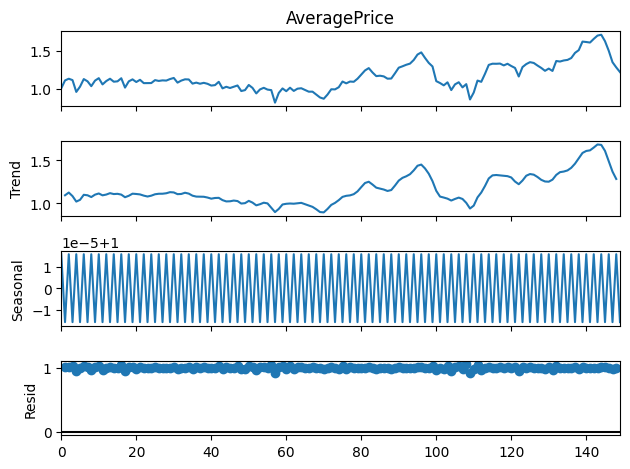

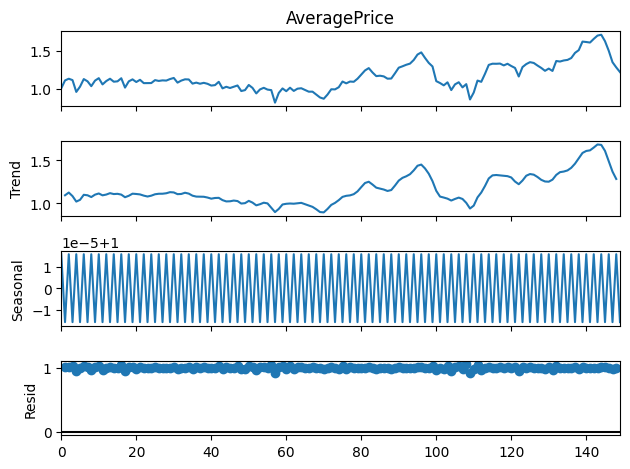

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(trainingdata['AveragePrice'], model='multiplicative', period=2)
multiplicative_decomposition.plot()

### Using ADF and ACF/PACF Plots to determine d,D values

In [19]:
# estimate the d value using the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(trainingdata['AveragePrice(-1)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.377105
p-value: 0.000326
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


In [20]:
# estimate the d value using the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
plottingdata = trainingdata.dropna(axis=0)
result = adfuller(plottingdata['AveragePrice(-2)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.690226
p-value: 0.000088
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


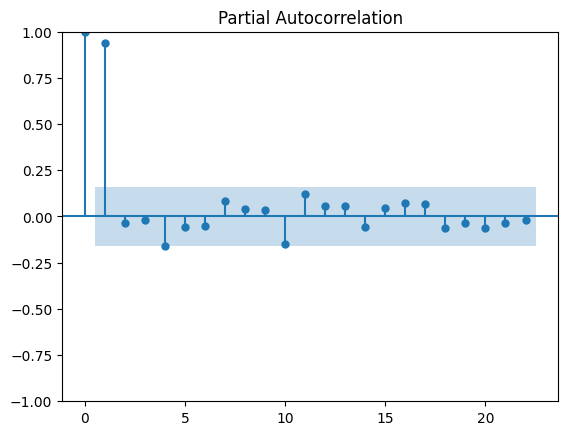

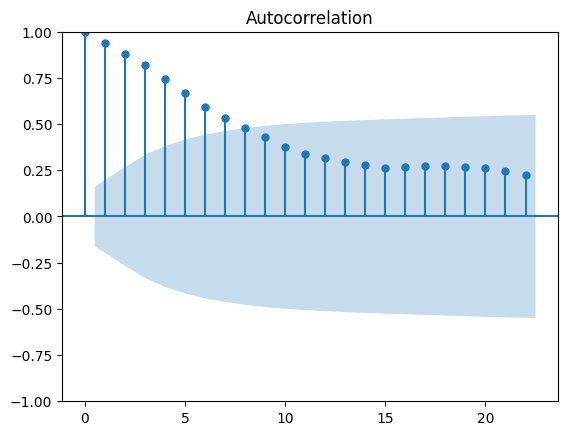

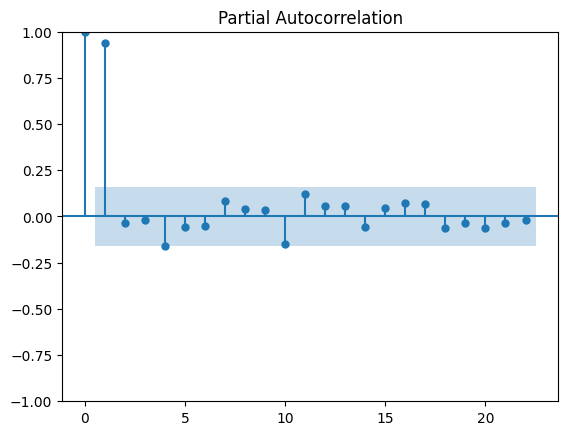

In [21]:
# Plot ACG and PACF plots to estimate the p and q values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(trainingdata['AveragePrice'],)
plot_pacf(trainingdata['AveragePrice']) 

### Deploying Auto-ARIMA to test for p,d,q and seasonal values

In [22]:
# use auto-arima to determine p, d, q values
from pmdarima import auto_arima
stepwise_model = auto_arima(trainingdata['AveragePrice'], start_p=1, start_q=0,
                           max_p=3, max_q=7, m=2,
                           seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=False, maxiter=1000,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(1,1,1)[2]             : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,1,0)[2]             : AIC=-301.398, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[2]             : AIC=-340.568, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[2]             : AIC=inf, Time=0.67 sec
 ARIMA(1,1,0)(0,1,0)[2]             : AIC=-299.760, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[2]             : AIC=-351.274, Time=0.50 sec
 ARIMA(1,1,0)(2,1,1)[2]             : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(2,1,0)[2]             : AIC=-353.243, Time=0.52 sec
 ARIMA(0,1,0)(1,1,0)[2]             : AIC=-341.956, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[2]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(1,1,1)[2]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,1)(2,1,0)[2]             : AIC=-351.279, Time=0.59 sec
 ARIMA(1,1,1)(2,1,0)[2]             : AIC=inf, Time=3.38 sec
 ARIMA(0,1,0)(2,1,0)[2] intercept   : AIC=-351.454, Time=0.74 sec

Best model:  ARIMA(0,1,0)(2,1,0)[2]          
Total fit time: 

In [23]:
from pmdarima import auto_arima

q_values = range(0, 8)
p=1

# Iterate over all combinations of p and q
for q in q_values:
    newstepwise_model = auto_arima(trainingdata['AveragePrice'], start_p=p, max_p=2, start_q=q,
                                max_q=7, m=2,
                                seasonal=True,
                                d=1, D=1, trace=True,
                                suppress_warnings=False, maxiter=10000,
                                stepwise=True)
    print(f'Tested p={p}, q={q}')
    print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(1,1,1)[2]             : AIC=inf, Time=2.22 sec
 ARIMA(0,1,0)(0,1,0)[2]             : AIC=-301.398, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[2]             : AIC=-340.568, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[2]             : AIC=inf, Time=1.30 sec
 ARIMA(1,1,0)(0,1,0)[2]             : AIC=-299.760, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[2]             : AIC=-351.274, Time=0.80 sec
 ARIMA(1,1,0)(2,1,1)[2]             : AIC=inf, Time=3.05 sec
 ARIMA(0,1,0)(2,1,0)[2]             : AIC=-353.243, Time=0.41 sec
 ARIMA(0,1,0)(1,1,0)[2]             : AIC=-341.956, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[2]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(1,1,1)[2]             : AIC=inf, Time=1.69 sec
 ARIMA(0,1,1)(2,1,0)[2]             : AIC=-351.279, Time=0.59 sec
 ARIMA(1,1,1)(2,1,0)[2]             : AIC=inf, Time=3.43 sec
 ARIMA(0,1,0)(2,1,0)[2] intercept   : AIC=-351.454, Time=0.94 sec

Best model:  ARIMA(0,1,0)(2,1,0)[2]          
Total fit time: 

In [24]:
# use auto-arima to determine p, d, q values assuming no seasonality
from pmdarima import auto_arima
stepwise_model = auto_arima(trainingdata['AveragePrice'], m=1,
                           seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=False, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-405.133, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-408.881, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-406.968, Time=0.02 sec


WARNING - (py.warnings._showwarnmsg) - c:\Users\choud\miniconda3\envs\tsnp_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

WARNING - (py.warnings._showwarnmsg) - c:\Users\choud\miniconda3\envs\tsnp_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-406.972, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-410.800, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-404.970, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.336 seconds
-410.79963862194097


### Triple-Holt Exponential Smoothening

In [25]:
# apply Winter-Holt Triple Exponential Smoothening to the data
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(trainingdata['AveragePrice'], trend= "add",seasonal=None)
model_fit = model.fit()

In [26]:
# predicting for the next 19 periods
forecast = model_fit.forecast(steps=19)

In [15]:
df_results = pd.DataFrame(forecast, columns = ['Forecast_Results'])